**Instituto Tecnológico de Aeronáutica – ITA**

**Inteligência Artificial PEE 2022**

**Faculty Advisor:**

Marcos Ricardo Omena de Albuquerque Maximo

# Otimização Metaheurística #

# 1.	Introdução
 
Nesse questionário, seu objetivo é implementar uma estratégia evolutiva simples e comparar seu desempenho com o CMA-ES em funções usadas como benchmark para algoritmos de otimização. A Figura 1 ilustra uma estratégia evolutiva sendo aplicada para otimizar a função de Rastrigin.

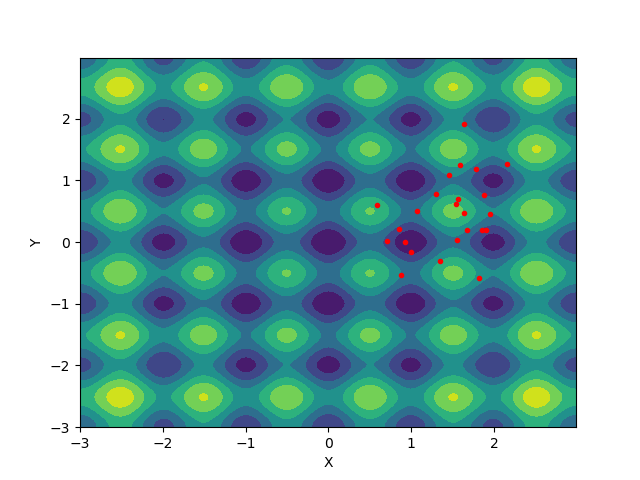

**Figura 1**:  otimização da função de Rastrigin usando estratégia evolutiva. As amostras são os pontos vermelhos.


# 2. Descrição do Problema

O problema a ser resolvido é a otimização de funções benchmark através de estratégias evolutivas. A saber, as seguintes funções serão usadas:

- **Translated Sphere (com centro em (1,2))** - *translated_sphere*:

$$f(x_1, x_2) = (x_1 -1)^2 + (x_2 - 2)^2 $$

- **Ackley** - *ackley*:

$$f(x_1, x_2) = -20 \exp{\left(-0.2 \sqrt{-0.5 \left(x_1^2 + x_2^2 \right)}\right)} - 
\exp{\left(0.5(\cos{(2\pi x_1 + 2 \pi x_2)}\right)} + \exp(1) + 20$$


- **Schaffer function N. 2** - *schaffer2d*:

$$f(x_1, x_2) = 0.5 + \frac{\sin^2 \left(x_1^2 - x_2^2 \right) - 0.5}{1 + 0.001 \left( x_1^2 + x_2^2\right)^2}$$

- **Rastrigin (2D)** - *rastrigin*:

$$f(x_1, x_2) = 2A + \sum_{i=1}^2 \left(x_i^2 - A \cos(2 \pi x_i) \right)$$

$$A = 10$$

A estratégia evolutiva que será implementada é bem simples e evolui apenas a média de uma distribuição gaussiana, sem adaptar a sua covariância, através das seguintes equações:

$$m^{(g+1)} = \frac{1}{\mu} \sum_{i=1}^{\mu} s_{i:\lambda}^{(g+1)},$$

$$C^{(g+1)} = C^{(g)},$$


em que $m^{(g+1)}$ e $C^{(g+1)}$ são a média e a covariância da distribuição gaussiana na geração $g+1$, $s_{i:\lambda}^{(g+1)}$ é $i$-ésima melhor amostra (de um total de $\lambda$ amostras em cada geração) e as $\mu$ melhores amostras são escolhidas para evoluir a distribuição gaussiana para a próxima geração. 
Perceba que $m^{(g+1)}$ e $s_{i:\lambda}^{(g+1)}$ são vetores, enquanto $C^{(g+1)}$ é uma matriz.

Então, será realizado um *benchmark* através de simulações de Monte Carlo para comparar os desempenhos dessa estratégia evolutiva simples (SES - *Simple Evolution Strategy*) e do CMA-ES.


# 3. Código Base

O código base já implementa teste e *benchmark* das estratégias evolutivas. A implementação das funções de *benchmark* se encontra no arquivo benchmark.py, que será baixado na célula seguinte. Além disso, o teste de *benchmark* usa a implementação oficial do CMA-ES na comparação.

O foco da sua implementação nesse laboratório é apenas o método ``tell()`` da classe *SimpleEvolutionStrategy*. Neste método, você deve evoluir a geração com base no vetor de *fitnesses* recebido, atualizando a média e gerando novas amostras. Perceba que embora a classe *SimpleEvolutionStrategy* tente seguir mais ou menos a interface da implementação oficial do CMA-ES, fez-se algumas modificações, de modo a deixar a implementação mais didática e mais simples quando se usa os recursos do NumPy.

# 4. Tarefas

Comece rodando a célula abaixo para instalar o pacote *cma* e fazer o download do arquivo *benchmark.py* com a implementação das funções de *benchmark*.

In [1]:
import zipfile
import os

# # install packages
# !pip install cma

# # download data (MUST RUN)
# !gdown --id 18YybjSfdxJdF2lerqF2GscKYVHO_-kaS

# with zipfile.ZipFile("iapee_quiz2_2022.zip","r") as zip_ref:
#   zip_ref.extractall() # extracts in current directory

# make results folder to save images
if not os.path.exists('results'):
  os.makedirs('results')
  
# os.remove("jonasdegrave_quiz2_2022.zip")

## 4.1.	Implementação da Estratégia Evolutiva Simples

Sua primeira tarefa consiste em implementar e testar a estratégia evolutiva simples (SES). Para isso, basta implementar o método ``tell()`` da classe *SimpleEvolutionStrategy*. Uma otimização usando um objeto dessa classe segue o seguinte pseudocódigo:

``` python
for i in range(num_iterations):
   samples = es.ask()
   for j in range(np.size(samples, 0)):
      fitnesses[j] = function(samples[j, :])
   es.tell(fitnesses)
```


In [2]:
import numpy as np


class SimpleEvolutionStrategy:
    """
    Represents a simple evolution strategy optimization algorithm.
    The mean and covariance of a gaussian distribution are evolved at each generation.
    """
    def __init__(self, m0, C0, mu, population_size):
        """
        Constructs the simple evolution strategy algorithm.

        :param m0: initial mean of the gaussian distribution.
        :type m0: numpy array of floats.
        :param C0: initial covariance of the gaussian distribution.
        :type C0: numpy matrix of floats.
        :param mu: number of parents used to evolve the distribution.
        :type mu: int.
        :param population_size: number of samples at each generation.
        :type population_size: int.
        """
        self.m = m0
        self.C = C0
        self.mu = mu
        self.population_size = population_size
        self.samples = np.random.multivariate_normal(self.m, self.C, self.population_size)

    def ask(self):
        """
        Obtains the samples of this generation to be evaluated.
        The returned matrix has dimension (population_size, n), where n is the problem dimension.

        :return: samples to be evaluated.
        :rtype: numpy array of floats.
        """
        return self.samples

    def tell(self, fitnesses):
        """
        Tells the algorithm the evaluated fitnesses. The order of the fitnesses in this array
        must respect the order of the samples.

        :param fitnesses: array containing the value of fitness of each sample.
        :type fitnesses: numpy array of floats.
        """
        #### FIRST VERSION
        ## Finds the best solution in the population
        # best_fitness = np.amin(fitnesses)
        # best_index = np.where(fitnesses == best_fitness)[0][0]
        # best_solution = self.samples[best_index]
        # ## Set the mean to the best solution
        # self.m = best_solution
        # ## Bonus: Compute decay
        # self.C *= 1 - (1/self.population_size)
        ## Sample new population around the new mean and variance
        # self.samples = np.random.multivariate_normal(self.m, self.C, self.population_size)

        #### NEW VERSION
        indexes = np.argsort(fitnesses)
        best_samples = self.samples[indexes[0:self.mu], :]
        best_fitnesses = fitnesses[indexes[0:self.mu]]

        self.m = np.mean(best_samples, axis=0)
        # self.C = np.cov(best_samples, rowvar=False)
        
        # print(f"indexes : {indexes}")
        # print(f"best_samples : {best_samples}")
        # print(f"best_fitnesses : {best_fitnesses}")

        # print(f"self.mu : {self.mu}")
        # print(f"self.population_size: {self.population_size}")
        # print(f"self.m : {self.m}")
        # print(f"self.C : {self.C}")
        # print()
        # print()

        ## Sample new population around the new mean and variance
        self.samples = np.random.multivariate_normal(self.m, self.C, self.population_size)

## 4.2 Teste das Estratégias Evolutivas


Teste sua implementação usando a célula abaixo. As variáveis que podem ser alteradas nessa célula são as seguintes:

- *algorithm*: escolhe entre o SES (‘*ses*’) e o CMA-ES (‘*cmaes*’). 
  - Obs.: você deve usar uma string com o nome do algoritmo.

- *function*: escolher a função de teste (*translated_sphere*, *ackley*, *schaffer2d* ou *rastrigin*). 
  - Obs.: usa-se “ponteiro de função” aqui.

Por padrão, o script usa o (12,24)-SES, i.e. $\mu=12$ e $\lambda=24$. Além disso, usa-se a estratégia padrão do CMA-ES, que escolhe $\mu=3$ e $\lambda=6$ para problemas 2D.

Como resultado do teste, é mostrada uma animação. Teste os dois algoritmos para as diferentes funções algumas vezes para pegar intuição. No seu relatório, comente de forma sucinta sobre os resultados para cada um dos algoritmos e das funções, principalmente sobre questões como convergência, incluindo sobre convergência para mínimo local. Além disso, o script salva uma figura (arquivo evolution_strategy.png) com o resultado final da otimização. Inclua figuras de um exemplo de execução para cada algoritmo e cada função no seu relatório.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from benchmark import translated_sphere, ackley, schaffer2d, rastrigin
import cma
from IPython.display import HTML


# Evolution Strategy algorithm (Simple ES or CMA-ES)
# algorithm = 'cmaes'  # 'ses' or 'cmaes'
# Function which the optimization algorithm will optimize
# function = translated_sphere  # translated_sphere, ackley, schaffer2d, rastrigin
fig_format = 'png'  # 'svg' (Word), 'eps' (Latex), 'png' (best compatibility/worst quality)

def animate(i):
    """
    Updates the optimization progress animation.

    :param i: current iteration.
    """
    plot_x.set_data(history_samples[i][:, 0], history_samples[i][:, 1])


def test_function (function, algorithm):
    # Yeah, this is a dirty hack to make the animations work outside function context.
    global animation, plot_x, history_samples

    print(f"Testing {function.__name__} with {algorithm} algorithm:")
    # Simple ES parameters
    m0 = np.random.uniform(np.array([-3.0, -3.0]), np.array([3.0, 3.0]))  # initial guess used in the optimization algorithm
    C0 = 0.3 * np.identity(2)  # initial covariance (SES)
    mu = 12  # number of parents used for computing the mean and covariance of the next generation (SES)
    population_size = 24  # population size (SES)
    # CMA-ES parameters
    sigma0 = 1.0  # initial step size (CMA-ES)

    if algorithm == 'ses':
        es = SimpleEvolutionStrategy(m0, C0, mu, population_size)
    else:
        es = cma.CMAEvolutionStrategy(m0, 1.0)

    num_iterations = 200
    history_samples = []  # collect the samples of all iterations
    for i in range(num_iterations):
        samples = es.ask()
        # To avoid making the implementation of SES harder, I avoided following
        # the same interface of CMA-ES, thus I need to put an if here.
        if algorithm == 'ses':
            fitnesses = np.zeros(np.size(samples, 0))
            for j in range(np.size(samples, 0)):
                fitnesses[j] = function(samples[j, :])
            es.tell(fitnesses)
            history_samples.append(samples)
        else:
            fitnesses = [function(sample) for sample in samples]
            es.tell(samples, fitnesses)
            # reshaping samples to be a numpy matrix
            reshaped_samples = np.zeros((len(samples), np.size(samples[0])))
            for j in range(len(samples)):
                reshaped_samples[j, :] = samples[j]
            history_samples.append(reshaped_samples)

    # Plotting a color map of the function
    fig, ax = plt.subplots(figsize=(5, 4))
    ax.set(xlim=(-3, 3), ylim=(-3, 3))
    x = np.arange(-3.0, 3.0, 0.01)
    y = np.arange(-3.0, 3.0, 0.01)
    [X, Y] = np.meshgrid(x, y)
    Z = np.zeros_like(X)
    for i in range(np.size(X, 0)):
        for j in range(np.size(X, 1)):
            Z[i, j] = function(np.array([X[i, j], Y[i, j]]))
    ax.contourf(X, Y, Z)
    # Plotting the samples
    num_generations = len(history_samples)
    plot_x, = ax.plot(history_samples[0][:, 0], history_samples[0][:, 1], '.r')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

    # # Making the animation
    # if function.__name__ == "translated_sphere":
    #     animation_translated_sphere = FuncAnimation(fig, animate, interval=100, frames=num_generations)
    # elif function.__name__ == "ackley":
    #     animation_ackley = FuncAnimation(fig, animate, interval=100, frames=num_generations)
    # elif function.__name__ == "schaffer2d":
    #     animation_schaffer2d = FuncAnimation(fig, animate, interval=100, frames=num_generations)
    # elif function.__name__ == "rastrigin":
    #     animation_rastrigin = FuncAnimation(fig, animate, interval=100, frames=num_generations)

    animation = FuncAnimation(fig, animate, interval=100, frames=num_generations)
    

    # Saving the last generation of the optimization algorithm
    plt.figure(figsize=(5,4))
    plt.contourf(X, Y, Z)
    plt.plot(history_samples[-1][:, 0], history_samples[-1][:, 1], '.r')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.savefig('results/evolution_strategy_{}_{}.{}'.format(algorithm, function.__name__, fig_format))

Testing translated_sphere with ses algorithm:


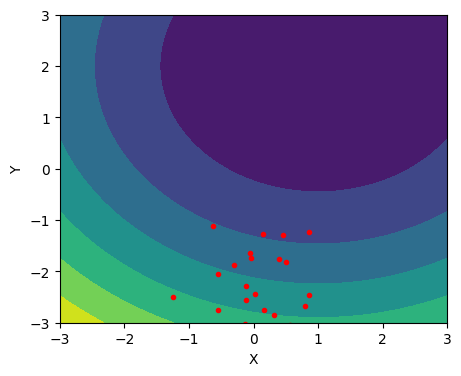

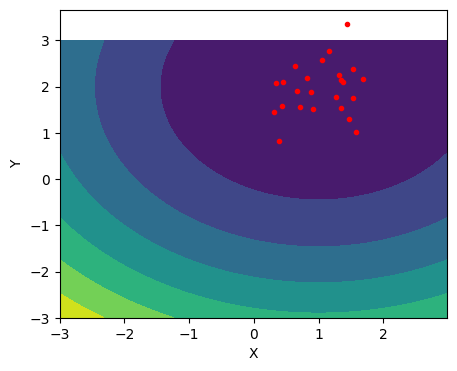

In [4]:
test_function(translated_sphere, 'ses')
HTML(animation.to_html5_video())

Testing translated_sphere with cmaes algorithm:
(3_w,6)-aCMA-ES (mu_w=2.0,w_1=63%) in dimension 2 (seed=124237, Sat Oct 29 15:29:04 2022)


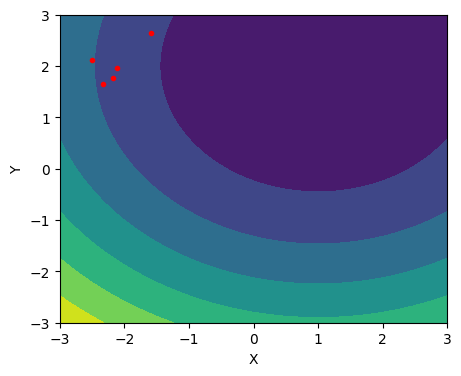

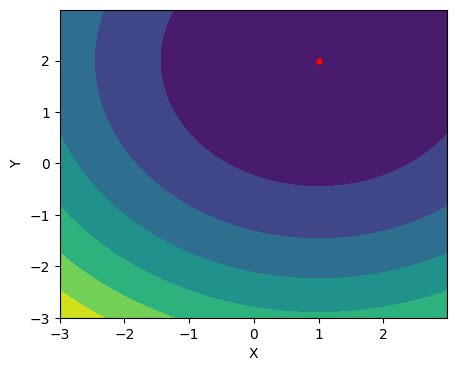

In [5]:
test_function(translated_sphere, 'cmaes')
HTML(animation.to_html5_video())

Testing ackley with ses algorithm:


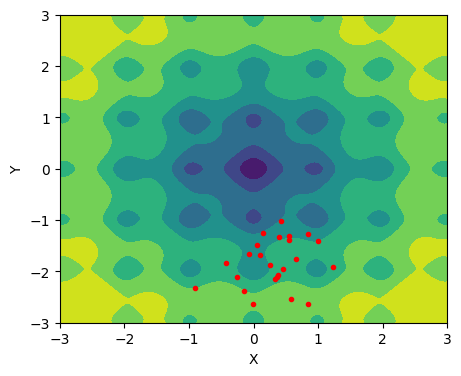

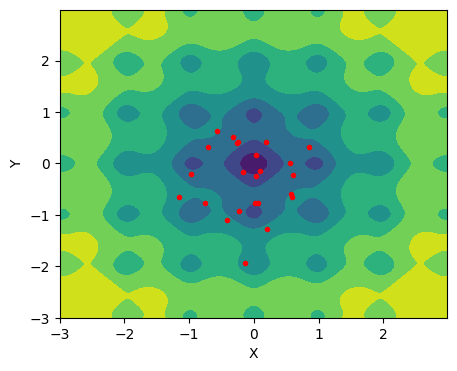

In [6]:
test_function(ackley, 'ses')
HTML(animation.to_html5_video())

Testing ackley with cmaes algorithm:
(3_w,6)-aCMA-ES (mu_w=2.0,w_1=63%) in dimension 2 (seed=187520, Sat Oct 29 15:29:21 2022)


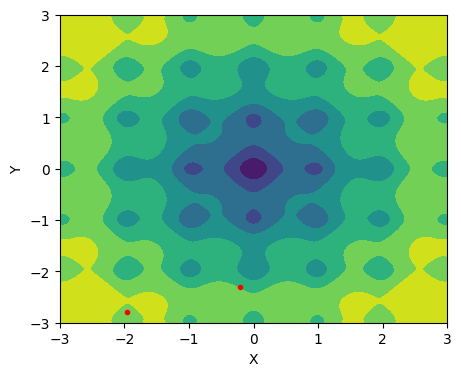

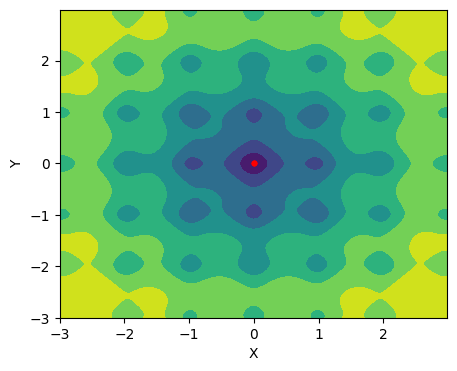

In [7]:
test_function(ackley, 'cmaes')
HTML(animation.to_html5_video())

Testing schaffer2d with ses algorithm:


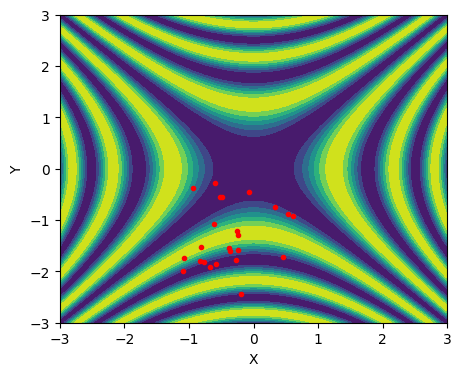

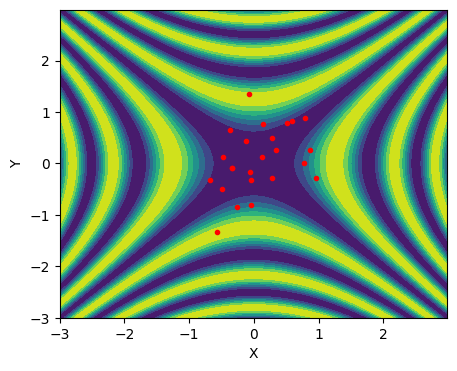

In [14]:
test_function(schaffer2d, 'ses')
HTML(animation.to_html5_video())

Testing schaffer2d with cmaes algorithm:
(3_w,6)-aCMA-ES (mu_w=2.0,w_1=63%) in dimension 2 (seed=142627, Sat Oct 29 15:35:01 2022)


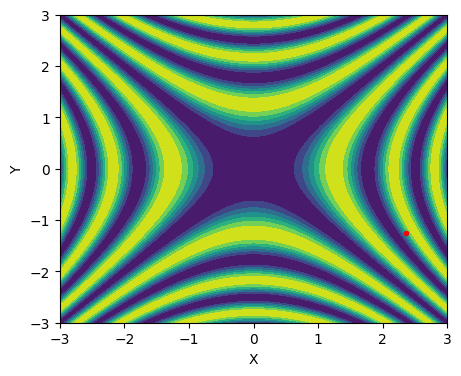

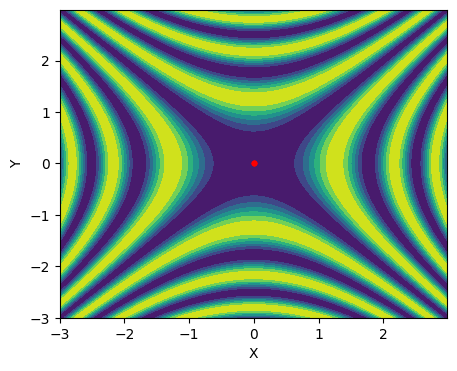

In [19]:
test_function(schaffer2d, 'cmaes')
HTML(animation.to_html5_video())

Testing rastrigin with ses algorithm:


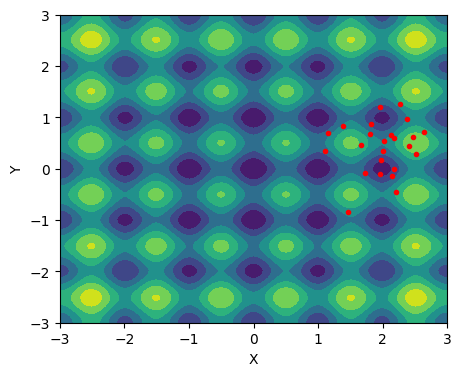

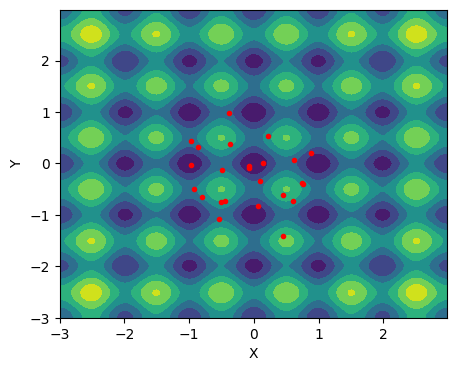

In [10]:
test_function(rastrigin, 'ses')
HTML(animation.to_html5_video())

Testing rastrigin with cmaes algorithm:
(3_w,6)-aCMA-ES (mu_w=2.0,w_1=63%) in dimension 2 (seed=168359, Sat Oct 29 15:37:56 2022)


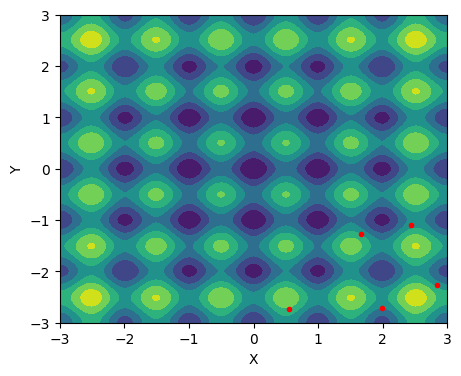

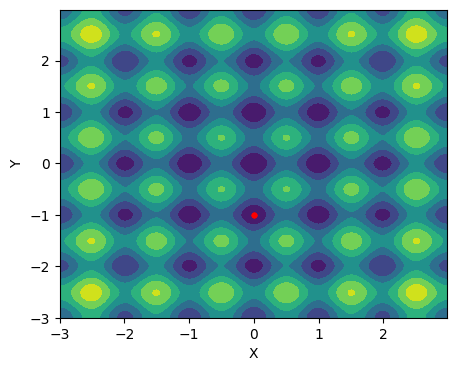

In [23]:
test_function(rastrigin, 'cmaes')
HTML(animation.to_html5_video())

## 4.3 Benchmark 

Finalmente, faremos um benchmark usando simulações de Monte Carlo para comparar os dois algoritmos. Esse benchmark é realizado ao rodar a célula ``benchmark_evolution_strategy`` já implementada abaixo. Em cada simulação de Monte Carlo, $m^{(0)}$ é amostrado uniformemente num quadrado de lado 6 e centrado em $(0,0)$. Com isso, executa-se uma quantidade considerável de simulações de Monte Carlo para garantir uma convergência adequada dos resultados. As métricas usadas são:
	
1. *Fitness* médio das amostras em cada geração (calcula-se uma média entre todas as simulações de Monte Carlo). Seja $M$ o número de execuções do Monte Carlo, essa métrica é calculada por:

$$f^{(g)}_{mean} = \frac{1}{M} \sum_{k=1}^{M} \sum_{i=1}^{\lambda} f\left(s_{i:\lambda}^{(g)}\right)$$


2. Melhor *fitness* entre todas as amostras em cada geração (calcula-se uma média entre todas as simulações de Monte Carlo). Essa métrica é calculada por:

$$f^{(g)}_{best} = \frac{1}{M} \sum_{k=1}^{M} \min_{i} f\left(s_{i:\lambda}^{(g)}\right)$$
    
Portanto, compara-se o desempenho entre:
1. (3,6)-SES: estratégia evolutiva simples com $\mu=3$ e $\lambda=6$.
2. (6,12)-SES: estratégia evolutiva simples com $\mu=6$ e $\lambda=12$.
3. (12,24)-SES: estratégia evolutiva simples com $\mu=12$ e $\lambda=24$.
4. CMA-ES: CMA-ES com estratégia padrão, que usa $\mu=3$ e $\lambda=6$.
	
Na célula ``benchmark_evolution_strategy`` abaixo, tem-se as seguintes variáveis:
- *num_trials*: número de execuções de Monte Carlo.
- *num_iterations*: número de gerações da estratégia evolutiva.
- *function*: função usada para benchmark.

Perceba que como está indicado em comentários no código, recomenda-se usar um número de execuções e de iterações maior para a função Schaffer2D, pois com os valores iniciais os resultados ficam muito ruidosos para essa função. Como isso faz o *benchmark* demorar mais, recomenda-se mudar os valores apenas para essa função.

No final, as métricas de benchmark são plotadas em gráficos. Analise estes gráficos e discuta brevemente na resposta do questionário suas conclusões. Faça *upload* de um .zip contendo os gráficos (que são salvos em arquivos com nomes mean_fitness_function-name.png e best_fitness_function-name.png) no sua resposta ao questionário (mais instruções a respeito disso a seguir).

### benchmark_evolution_strategy

Benchmarking translated_sphere


CMA-ES:  33%|███▎      | 166/500 [00:23<00:53,  6.25it/s]z:\Programs\Python310\lib\site-packages\cma\utilities\utils.py:343: UserWarning: sigma change np.exp(1.4012703940452866) = 4.060354942466866 clipped to np.exp(+-1) (class=CMAAdaptSigmaCSA method=update iteration=175)
  warnings.warn(msg + ' (' +
CMA-ES: 100%|██████████| 500/500 [01:12<00:00,  6.93it/s]


Benchmarking ackley


CMA-ES: 100%|██████████| 500/500 [01:11<00:00,  6.97it/s]


Benchmarking schaffer2d


CMA-ES:  22%|██▏       | 111/500 [00:15<00:58,  6.68it/s]z:\Programs\Python310\lib\site-packages\cma\utilities\utils.py:343: UserWarning: sigma change np.exp(1.0258147684857015) = 2.789367223468496 clipped to np.exp(+-1) (class=CMAAdaptSigmaCSA method=update iteration=72)
  warnings.warn(msg + ' (' +
CMA-ES:  28%|██▊       | 142/500 [00:20<00:51,  6.98it/s]z:\Programs\Python310\lib\site-packages\cma\utilities\utils.py:343: UserWarning: sigma change np.exp(1.0889631777001432) = 2.9711918769994057 clipped to np.exp(+-1) (class=CMAAdaptSigmaCSA method=update iteration=166)
  warnings.warn(msg + ' (' +
CMA-ES:  69%|██████▉   | 346/500 [00:49<00:21,  7.14it/s]z:\Programs\Python310\lib\site-packages\cma\utilities\utils.py:343: UserWarning: sigma change np.exp(1.004892266766397) = 2.731612971474825 clipped to np.exp(+-1) (class=CMAAdaptSigmaCSA method=update iteration=183)
  warnings.warn(msg + ' (' +
CMA-ES:  70%|██████▉   | 349/500 [00:50<00:21,  7.03it/s]z:\Programs\Python310\lib\site-pack

Benchmarking rastrigin


CMA-ES:  47%|████▋     | 233/500 [00:30<00:35,  7.52it/s]z:\Programs\Python310\lib\site-packages\cma\utilities\utils.py:343: UserWarning: sigma change np.exp(1.0024121490310776) = 2.7248466438111594 clipped to np.exp(+-1) (class=CMAAdaptSigmaCSA method=update iteration=197)
  warnings.warn(msg + ' (' +
CMA-ES: 100%|██████████| 500/500 [01:06<00:00,  7.49it/s]


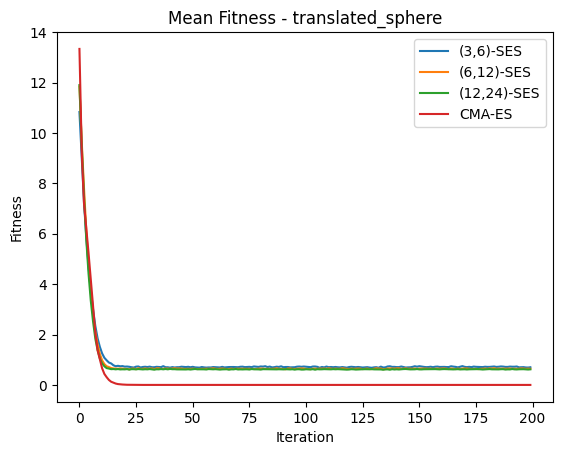

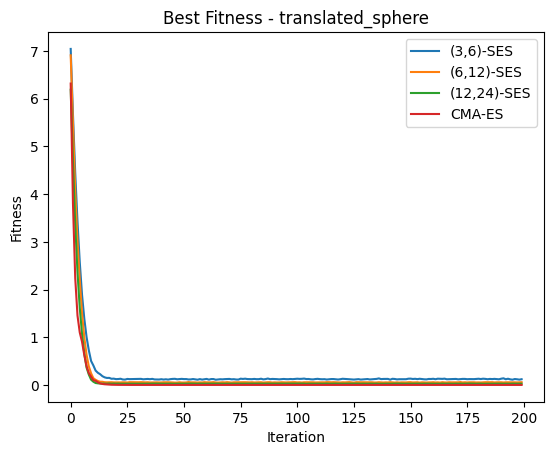

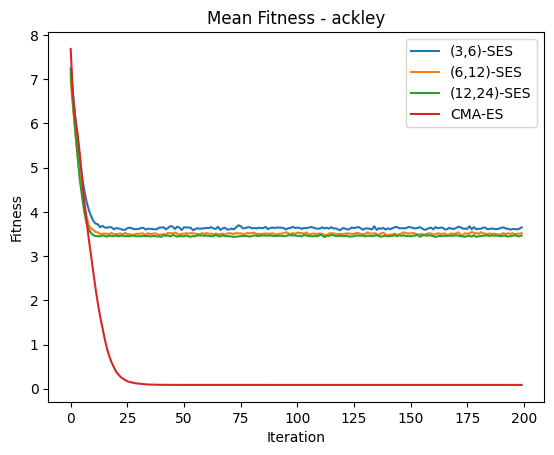

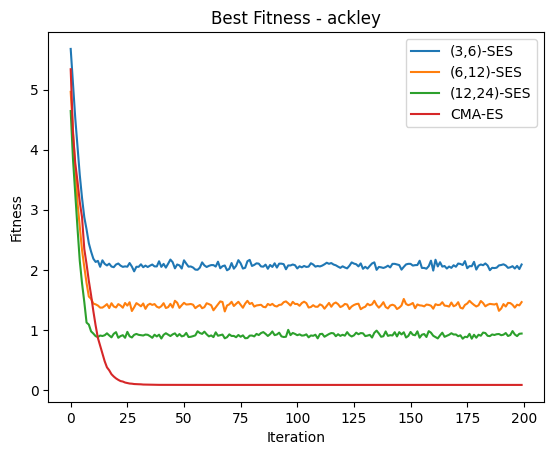

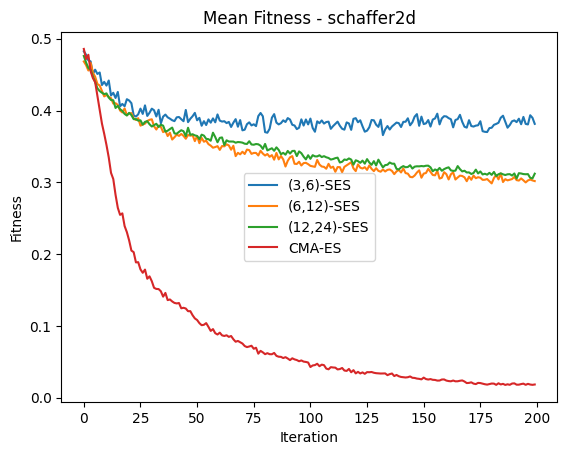

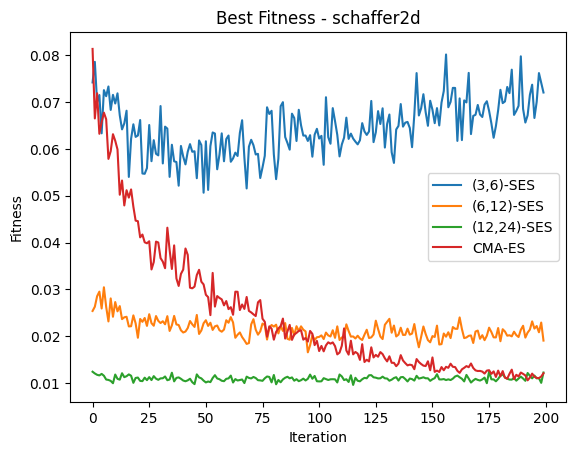

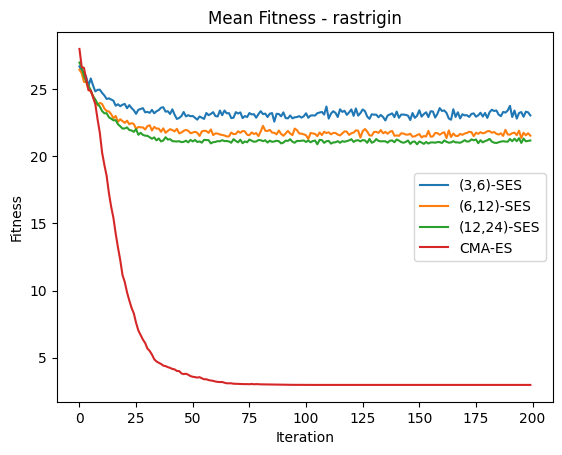

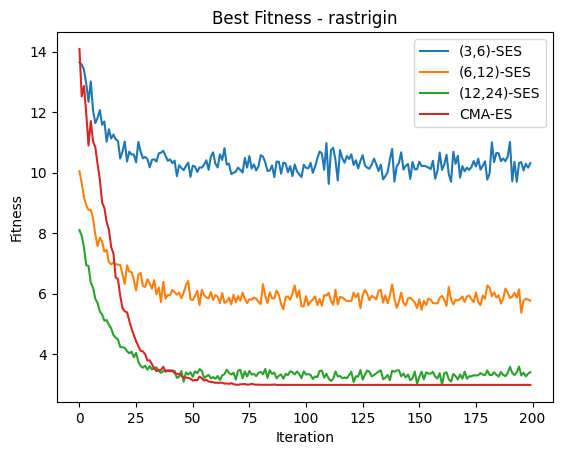

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from benchmark import translated_sphere, ackley, schaffer2d, rastrigin
import cma

# num_trials is the number of trials used in Monte Carlo
# num_iterations is the number of generations the algorithms are executed during a Monte Carlo trial
# num_trials = 500  # recommended for schaffer2d
num_trials = 500  # recommended for all other functions
# num_iterations = 200  # recommended for schaffer2d
num_iterations = 200  # recommended for all other functions
fig_format = 'png'  # 'svg' (Word), 'eps' (Latex), 'png' (best compatibility/worst quality)


class Params:
    """
    An auxiliary class for storing parameters.
    """
    pass


def benchmark_algorithm(num_trials, num_iterations, algorithm, function, hyperparams):
    """
    Benchmarks an evolution strategy algorithm using Monte Carlo (MC) simulations.

    :param num_trials: number of Monte Carlo runs.
    :type num_trials: int.
    :param num_iterations: number of iterations.
    :type num_iterations: int.
    :param algorithm: evolution strategy algorithm (ses or cmaes).
    :type algorithm: str.
    :param function: function used for benchmarking.
    :type function: function.
    :param hyperparams: hyperparams of the algorithm.
    :type hyperparams: Params.
    :return mean_fitness: array containing the mean fitness of samples at each iteration (averaged over all MC trials).
    :rtype mean_fitness: numpy array of floats.
    :rtype best_fitness: array containing the best fitness of samples at each iteration (averaged over all MC trials).
    :rtype best_fitness: numpy array of floats.
    """
    if algorithm == 'ses':
        benchmark_name = '(%d,%d)-SES' % (hyperparams.mu, hyperparams.population_size)
    else:
        benchmark_name = 'CMA-ES'
    mean_fitness = [0.0] * num_iterations
    best_fitness = [0.0] * num_iterations
    # Printing the benchmarking status for the user
    for k in tqdm(range(num_trials), desc=benchmark_name):
        # Sampling the initial guess using an uniform distribution
        m0 = np.random.uniform(hyperparams.lower, hyperparams.upper)
        if algorithm == 'ses':
            C0 = hyperparams.C0
            es = SimpleEvolutionStrategy(m0, C0, hyperparams.mu, hyperparams.population_size)
        else:
            es = cma.CMAEvolutionStrategy(m0, hyperparams.sigma0, {'verb_disp': 0})
        for i in range(num_iterations):
            samples = es.ask()
            if algorithm == 'ses':
                fitnesses = np.zeros(np.size(samples, 0))
                for j in range(np.size(samples, 0)):
                    fitnesses[j] = function(samples[j, :])
                es.tell(fitnesses)
            else:
                fitnesses = [function(sample) for sample in samples]
                es.tell(samples, fitnesses)
            mean_fitness[i] += np.mean(fitnesses)
            best_fitness[i] += np.min(fitnesses)
    for i in range(num_iterations):
        mean_fitness[i] /= num_trials
        best_fitness[i] /= num_trials
    return mean_fitness, best_fitness

for function in (translated_sphere, ackley, schaffer2d, rastrigin):
    print(f"Benchmarking {function.__name__}")
    hyperparams = Params()
    # lower and upper are used for sampling the initial guess
    hyperparams.lower = np.array([-3.0, -3.0])  # SES and CMA-ES
    hyperparams.upper = np.array([3.0, 3.0])  # SES and CMA-ES
    hyperparams.C0 = 0.3 * np.identity(2)  # SES only
    hyperparams.sigma0 = 1.0  # CMA-ES only

    # The default CMA-ES strategy (which is used here) uses mu = 3 and population_size = 6
    hyperparams.mu = 3  # SES only
    hyperparams.population_size = 6  # SES only
    # Benchmarking (3,6)-SES
    mean_ses6, best_ses6 = benchmark_algorithm(num_trials, num_iterations, 'ses', function, hyperparams)
    hyperparams.mu = 6  # SES only
    hyperparams.population_size = 12  # SES only
    # Benchmarking (6,12)-SES
    mean_ses12, best_ses12 = benchmark_algorithm(num_trials, num_iterations, 'ses', function, hyperparams)
    hyperparams.mu = 12  # SES only
    hyperparams.population_size = 24  # SES only
    # Benchmarking (12,24)-SES
    mean_ses24, best_ses24 = benchmark_algorithm(num_trials, num_iterations, 'ses', function, hyperparams)
    # Benchmarking (3_w,6)-CMA-ES
    mean_cmaes, best_cmaes = benchmark_algorithm(num_trials, num_iterations, 'cmaes', function, hyperparams)
    plt.figure()
    plt.plot(mean_ses6)
    plt.plot(mean_ses12)
    plt.plot(mean_ses24)
    plt.plot(mean_cmaes)
    plt.legend(['(3,6)-SES', '(6,12)-SES', '(12,24)-SES', 'CMA-ES'])
    plt.xlabel('Iteration')
    plt.ylabel('Fitness')
    plt.title('Mean Fitness - {}'.format(function.__name__))
    plt.savefig('results/mean_fitness_{}.{}'.format(function.__name__, fig_format))
    plt.figure()
    plt.plot(best_ses6)
    plt.plot(best_ses12)
    plt.plot(best_ses24)
    plt.plot(best_cmaes)
    plt.legend(['(3,6)-SES', '(6,12)-SES', '(12,24)-SES', 'CMA-ES'])
    plt.xlabel('Iteration')
    plt.ylabel('Fitness')
    plt.title('Best Fitness - {}'.format(function.__name__))
    plt.savefig('results/best_fitness_{}.{}'.format(function.__name__, fig_format))


plt.show()

# 5. Entrega

Para gerar um .zip com todas as figuras geradas pelo código, execute o trecho de código a seguir. Pede-se renomear o .zip para que tenha padrão de nome <login_ga>_questionario2.zip. Por exemplo, se seu login @ga.ita.br é marcos.maximo, você deve nomear o .zip como marcos.maximo_questionario2.zip.

In [25]:
# from google.colab import files
import os

os.system('7z a jonasdegrave_quiz2_results.zip results')

# os.system('zip -r jonasdegrave_quiz2_results.zip results')
# files.download("jonasdegrave_quiz2_results.zip")

0

# 6. Dicas

- Para usuários do MATLAB, o seguinte link de migração de MATLAB para NumPy é interessante: https://numpy.org/doc/stable/user/numpy-for-matlab-users.html 

- Para criar um vetor de zeros usando NumPy que tenha o mesmo número de elementos que outro vetor, faça:
```
array = np.zeros(np.size(other_array))
```
	
- Operações normais de vetor, como soma, subtração e multiplicação por escalar, funciona como esperado em NumPy:
```
sum = a + b
sub = a - b
mul_scalar = scalar * a
```

- Para amostrar *population_size* amostras de uma gaussiana multivariada com média *m* e covariância *C*, use:
```
x = np.random.multivariate_normal(m, C, population_size)
```
Nesse caso, as amostras ficam numa matriz de dimensão (*population_size*, *n*), em que *n* é a dimensão do problema.

- Para pegar as $\mu$ melhores amostras de um certo vetor, pode-se usar:
```
indices = np.argsort(fitnesses)
best_samples = self.samples[indices[0:mu], :]
```
	
- Se estiver usando PyCharm e estiver tendo problema para execução da animação da otimização, é provavelmente por conta da opção “*Show plots in tool window*” estar ativa. Vá em ``File->Settings``, então em ``Tools->Python Scientific`` e desative ``Show plots in tool window``. Veja a Figura 2.


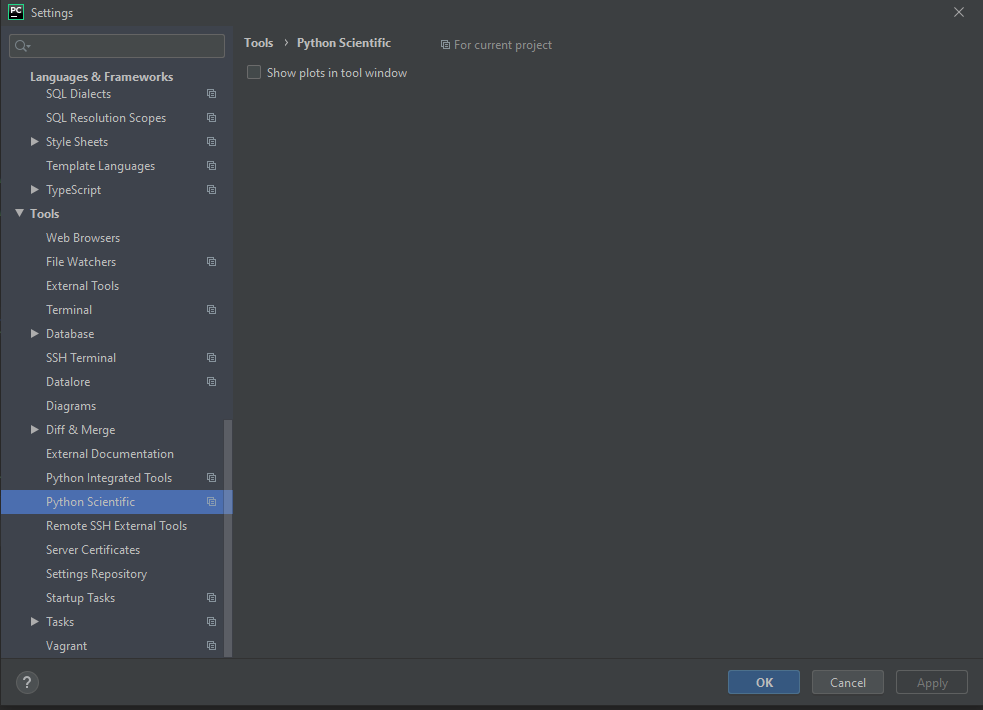

**Figura 2**: configuração da ferramenta “*show plots in tool window*” do PyCharm.

- Para fazer o download do notebook no Colab, vá em ``File > Download >  Download .ipynb``